# FINRA Surveillance Business Analyst Pre-Screening Tasks

Import the necessary packages to the jupyter notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Create a sample data.

In [2]:
data = {'DATE':['2/3/2014', '2/4/2014', '2/7/2014', '2/10/2014',
                '2/12/2014','2/14/2014','2/21/2014',
                '2/24/2014','2/25/2014','2/27/2014'],
        'FIRM':['1ABC', '2BCD', '1ABC', '3CDE','4DEF',
                '3CDE','1ABC','1ABC','4DEF','CDE'],       
        'SYMBOL':['A123','B234','C345','C345','B234',
                  'B234','A123','A123','C345','B234'],
        'SIDE':['B','B','S','S','B','B','B','S','B','S'],
        'QUANTITY': [200,600,600,600,200,300,300,300,2100,1100],
       'PRICE': [41,60,70,70,62,61,40,30,71,63]}

df = pd.DataFrame(data)
df

,DATE,FIRM,SYMBOL,SIDE,QUANTITY,PRICE
0,2/3/2014,1ABC,A123,B,200,41
1,2/4/2014,2BCD,B234,B,600,60
2,2/7/2014,1ABC,C345,S,600,70
3,2/10/2014,3CDE,C345,S,600,70
4,2/12/2014,4DEF,B234,B,200,62
5,2/14/2014,3CDE,B234,B,300,61
6,2/21/2014,1ABC,A123,B,300,40
7,2/24/2014,1ABC,A123,S,300,30
8,2/25/2014,4DEF,C345,B,2100,71
9,2/27/2014,CDE,B234,S,1100,63


### Question 1. Based on the data in the table above, please draft a paragraph that describes your data observations and description of what is going on in the market during February 2014.

We firstly plot the histogram of transactions for each firm and each symbol.

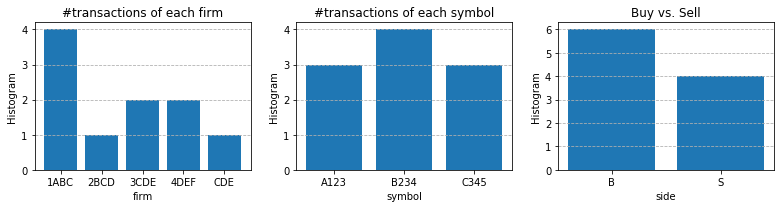

In [3]:
fig, ax = plt.subplots(1, 3,figsize=(11,3))

firms,counts = np.unique(df['FIRM'],return_counts=True)
ax[0].bar(firms, counts)
ax[0].set_title('#transactions of each firm')
ax[0].set_xlabel('firm')
ax[0].set_xticks([0,1,2,3,4])

firms,counts = np.unique(df['SYMBOL'],return_counts=True)
ax[1].bar(firms, counts)
ax[1].set_title('#transactions of each symbol')
ax[1].set_xlabel('symbol')

firms,counts = np.unique(df['SIDE'],return_counts=True)
ax[2].bar(firms, counts)
ax[2].set_title('Buy vs. Sell')
ax[2].set_xlabel('side')

for i in range(3):
    ax[i].grid(axis='y',ls='--')
    ax[i].set_ylabel('Histogram')

fig.tight_layout(h_pad=1, w_pad=1.5)

From the histogram graphs, we can conclude that

1) There were 5 firms (1ABC, 2BCD, 3CDE, 4DEF, CDE) that made 10 transactions in total. 1ABC was the firm that trade the most frequently (with 4 transactions). 2BCD and CDE are the firms that trade only 1 transaction. 3CDE and 4DEF equally made 2 transactions.

2) 3 symbols were made, including A123, B234 and C345.

3) 10 transactions were made in total, including 6 buys and 4 sells.

We then plot the histogram of quantity and price.

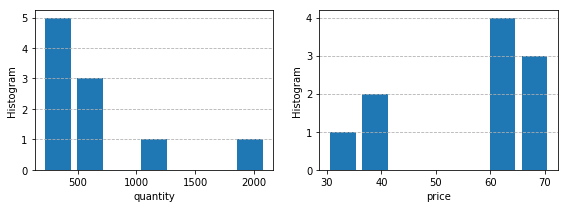

In [4]:
fig, ax = plt.subplots(1, 2,figsize=(8,3))

q = df['QUANTITY']
bins = np.linspace(min(q), max(q),8)
ax[0].hist(q,bins,histtype='bar',rwidth=0.8)
ax[0].grid(axis='y',ls='--')
ax[0].set_xlabel('quantity')
ax[0].set_ylabel('Histogram')

p = df['PRICE']
bins = np.linspace(min(p), max(p),8)
ax[1].hist(p,bins,histtype='bar',rwidth=0.8)
ax[1].grid(axis='y',ls='--')
ax[1].set_xlabel('price')
ax[1].set_ylabel('Histogram')

fig.tight_layout(h_pad=1, w_pad=1.5)

The quantity distributed as a Posion function, which the most trading frequency was about 200-300.
The price per share was mostly 60-70.

Calculate the total dollar volume of buy and the total volume of sell.

In [5]:
## Total buy
df1 = df[df['SIDE'] == 'B']
total_buy = sum(df1['QUANTITY']*df1['PRICE'])
print('Total buy:',total_buy)

## Total sell
df2 = df[df['SIDE'] == 'S']
total_sell = sum(df2['QUANTITY']*df2['PRICE'])
print('Total sell:',total_sell)

total buy: 236000
total sell: 162300


In [ ]:
We visualize the result.

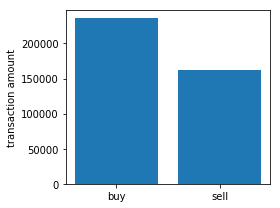

In [6]:
fig, ax = plt.subplots(1, 1,figsize=(4,3))

ax.bar(['buy','sell'], [total_buy,total_sell])
ax.set_ylabel('transaction volume')

fig.tight_layout(h_pad=1, w_pad=1.5)

### Question 2. Your business user asks you for a series of items as follows. In each of the items below, if you make assumptions to complete the task, please document them.
#### A. Your business user asks you to tell them the unique symbols in the data table above.

Use `np.unique` to find the unique symbols in the data table, then write the result.

In [7]:
unique_symbol = np.unique(df['SYMBOL'])
print('There were', len(unique_symbol), 'unique symbols:')
print(unique_symbol)

There were 3 unique symbols:
['A123' 'B234' 'C345']


#### B. Your business user asks you to tell them the unique firm and symbol combinations in the data table above.

Create a new column that combines the unique `firm` and `symbol`.

In [8]:
df['firm_symbol'] = df['FIRM'].map(str) + df['SYMBOL']

Use `np.unique` to find the unique combinations, then write the result.

In [9]:
unique_firm_symbol = np.unique(df['firm_symbol'])
print('There were', len(unique_firm_symbol), 'unique firm-symbol combinations:')
print(unique_firm_symbol)

There were 8 unique firm-symbol combinations:
['1ABCA123' '1ABCC345' '2BCDB234' '3CDEB234' '3CDEC345' '4DEFB234'
 '4DEFC345' 'CDEB234']


#### C. Your business user asks you to show them a table that includes the number of trades for each firm and symbol combination in the data table above.

Use `np.unique` with option `return_counts = True` to find the unique combinations and number of trades for each combinations.

In [10]:
unique_firm_symbol,number_trades = np.unique(df['firm_symbol'],return_counts=True)

Create a data frame to show the result.

In [11]:
data_firm_symbol = {'firm_symbol': unique_firm_symbol,'number_trades':number_trades}
df_firm_symbol = pd.DataFrame(data_firm_symbol)
df_firm_symbol

,firm_symbol,number_trades
0,1ABCA123,3
1,1ABCC345,1
2,2BCDB234,1
3,3CDEB234,1
4,3CDEC345,1
5,4DEFB234,1
6,4DEFC345,1
7,CDEB234,1


### Question 3. Based on the data table above, your business user asks you to create a report that shows, for each firm, the symbols they traded and the total dollar volume they traded in that symbol.

Find the unique firms.

In [12]:
unique_firm = np.unique(df['FIRM'])
print('The unique firms:',unique_firm)
print('Number of unique firms:',len(unique_firm))

The unique firms: ['1ABC' '2BCD' '3CDE' '4DEF' 'CDE']
Number of unique firms: 5


Make a for loop to show the result for each firm. To find the total volumn they traded in each Create a new data frame for each firm

In [19]:
for firm in unique_firm:
    print("\n")
    print('Firm:',firm)
    
    ## create a new data frame for each firm:
    df_firm = df[df['FIRM'] == firm]    
    unique_symbol = np.unique(df_firm['SYMBOL'])
    print('the symbols they traded:',unique_symbol)
    
    ## total buy
    df1 = df_firm[df_firm['SIDE'] == 'B']
    total_buy = sum(df1['QUANTITY']*df1['PRICE'])
    print('total buy:',total_buy)

    ## total sell
    df2 = df_firm[df_firm['SIDE'] == 'S']
    total_sell = sum(df2['QUANTITY']*df2['PRICE'])
    print('total sell:',total_sell)
    
    ## total buy + total sell
    print('buy + sell:', total_buy + total_sell)    



Firm: 1ABC
the symbols they traded: ['A123' 'C345']
total buy: 20200
total sell: 51000
buy + sell: 71200


Firm: 2BCD
the symbols they traded: ['B234']
total buy: 36000
total sell: 0
buy + sell: 36000


Firm: 3CDE
the symbols they traded: ['B234' 'C345']
total buy: 18300
total sell: 42000
buy + sell: 60300


Firm: 4DEF
the symbols they traded: ['B234' 'C345']
total buy: 161500
total sell: 0
buy + sell: 161500


Firm: CDE
the symbols they traded: ['B234']
total buy: 0
total sell: 69300
buy + sell: 69300
